In [3]:
#astropy library
import astropy.coordinates as coord
from astropy.table import QTable
import astropy.units as u
from astroquery.gaia import Gaia

#third-party imports
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

#gala imports
import gala.coordinates as gc
import gala.dynamics as gd
import gala.potential as gp
from gala.units import galactic

#LATAR BELAKANG ILMIAH
Misi Gaia adalah misi ESA yang bertujuan untuk mengukur posisi 3D dan kecepatan sejumlah besar bintang di seluruh Bima Sakti. Tujuan misi utama adalah untuk memungkinkan mempelajari pembentukan, struktur, dan sejarah evolusi Galaksi kita dengan mengukur astrometri (posisi langit, paralaks, dan gerakan yang tepat) untuk sekitar 2 miliar bintang lebih terang dari Gaia G-band besarnya fotometrik G ≲ 21.Pada akhir misi (~ 2022), Gaia juga akan menyediakan fotometri multi-band dan spektrofotometri resolusi rendah untuk sumber-sumber ini, bersama dengan kecepatan radial atau line-of-sight untuk subsampel sekitar 100 juta bintang.

Pada April 2018, Gaia secara terbuka merilis katalog data utama pertamanya — rilis data 2 atau DR2 — yang menyediakan subset data ini kepada siapa pun yang memiliki koneksi internet. Dalam tutorial ini, kita akan menggunakan astrometri, kecepatan radial, dan fotometri untuk subset kecil DR2 untuk mempelajari kinematika berbagai jenis bintang di Bima Sakti.

In [4]:
query_text = '''SELECT TOP 4096 ra, dec, parallax, pmra, pmdec, radial_velocity,
phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag
FROM gaiadr2.gaia_source
WHERE parallax_over_error > 10 AND
    parallax > 10 AND
    radial_velocity IS NOT null
ORDER BY random_index
'''
job = Gaia.launch_job(query_text)
gaia_data = job.get_results()
gaia_data.write('gaia_data.fits', overwrite=True)


In [5]:
gaia_data = QTable.read('gaia_data.fits')

In [6]:
gaia_data[:4]

ra,dec,parallax,pmra,pmdec,radial_velocity,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag
deg,deg,mas,mas / yr,mas / yr,km / s,mag,mag,mag
float64,float64,float64,float64,float64,float64,float32,float32,float32
256.8370985186671,46.5081010273448,10.770964834345387,-19.76657104695835,55.92605676622464,-17.673072044811907,12.956912994384766,14.192928314208984,11.859498023986816
129.45826809010867,-6.806694022293258,41.081670013380716,-297.34595349374183,43.83424795415093,35.53814452290586,6.576352119445801,6.931065082550049,6.111272811889648
2.317856723637118,9.00699655780345,17.824765284426462,-171.8278607514459,-1083.8740928197751,-148.91780163518774,13.119074821472168,13.968703269958496,12.223302841186523
330.41287472805976,51.88897801553169,13.0756133009657,-85.30745872006916,-34.23366534215265,-28.726469345049587,12.101919174194336,13.05264949798584,11.149785995483398


In [7]:
dist = coord.Distance(parallax=u.Quantity(gaia_data['parallax']))
dist.min(), dist.max()


(<Distance 8.79909291 pc>, <Distance 99.99985292 pc>)

In [8]:
c = coord.SkyCoord(ra=gaia_data['ra'], 
                   dec=gaia_data['dec'],
                   distance=dist,
                   pm_ra_cosdec=gaia_data['pmra'], 
                   pm_dec=gaia_data['pmdec'],
                   radial_velocity=gaia_data['radial_velocity'])

In [9]:
c[:4]

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    [(256.83709852, 46.50810103, 92.84219338),
     (129.45826809, -6.80669402, 24.3417563 ),
     (  2.31785672,  9.00699656, 56.1017205 ),
     (330.41287473, 51.88897802, 76.47824825)]
 (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
    [( -19.76657105,    55.92605677,  -17.67307204),
     (-297.34595349,    43.83424795,   35.53814452),
     (-171.82786075, -1083.87409282, -148.91780164),
     ( -85.30745872,   -34.23366534,  -28.72646935)]>

In [10]:
c.galactic[:4]

<SkyCoord (Galactic): (l, b, distance) in (deg, deg, pc)
    [( 72.32926334,  36.8367097 , 92.84219338),
     (232.07542475,  19.9763116 , 24.3417563 ),
     (105.68646983, -52.44715126, 56.1017205 ),
     ( 98.28701089,  -2.66800849, 76.47824825)]
 (pm_l_cosb, pm_b, radial_velocity) in (mas / yr, mas / yr, km / s)
    [(  55.13035551,   21.88801174,  -17.67307204),
     (-195.30630898, -228.4545973 ,   35.53814452),
     (-455.13470935, -998.57912013, -148.91780164),
     ( -88.74713695,   23.94268239,  -28.72646935)]>

In [11]:
coord.Galactocentric()

<Galactocentric Frame (galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.122 kpc, galcen_v_sun=(12.9, 245.6, 7.78) km / s, z_sun=20.8 pc, roll=0.0 deg)>

In [12]:
galcen = c.transform_to(coord.Galactocentric(z_sun=0*u.pc, galcen_distance=8.1*u.kpc))

In [13]:
galcen[:4]

<SkyCoord (Galactocentric: galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.1 kpc, galcen_v_sun=(12.9, 245.6, 7.78) km / s, z_sun=0.0 pc, roll=0.0 deg): (x, y, z) in pc
    [(-8077.44468803,  70.79989896,  55.66242071),
     (-8114.06090109, -18.04601124,   8.31586669),
     (-8109.24493623,  32.92015736, -44.47693151),
     (-8111.0109288 ,  75.59768012,  -3.55986822)]
 (v_x, v_y, v_z) in km / s
    [(-16.26556759, 233.98501167,   4.89424163),
     (-30.94107553, 226.00094753,  -4.85474972),
     (210.89926667, -11.75804787, -36.02277769),
     ( 48.81632893, 222.24147077,  17.78803683)]>

Text(0.5, 0, '$z$[$\\mathrm{pc}$]')

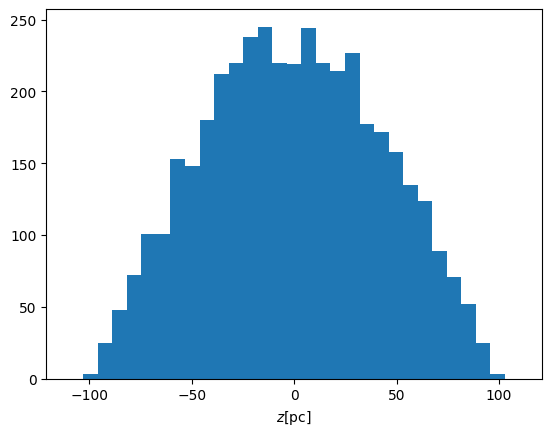

In [14]:
plt.hist(galcen.z.value, bins=np.linspace(-110,110,32))
plt.xlabel('$z$[{0:latex_inline}]'.format(galcen.z.unit))

Text(0, 0.5, '$v_y$ [$\\mathrm{km\\,s^{-1}}$]')

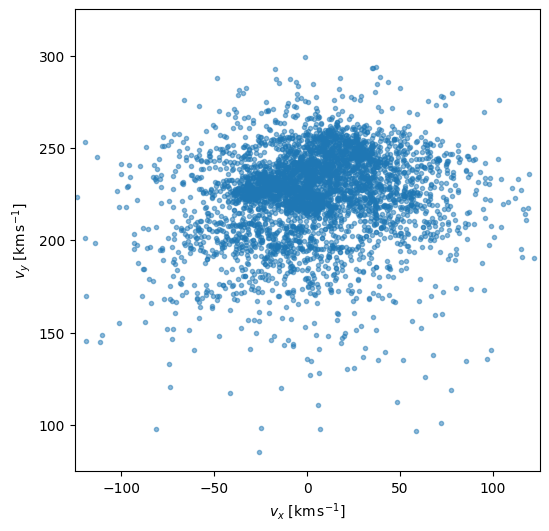

In [15]:
fig,ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(galcen.v_x.value, galcen.v_y.value, marker='.', ls='none', alpha=0.5)
ax.set_xlim(-125, 125)
ax.set_ylim(200-125, 200+125)
ax.set_xlabel('$v_x$ [{0:latex_inline}]'.format(u.km/u.s))
ax.set_ylabel('$v_y$ [{0:latex_inline}]'.format(u.km/u.s))

In [16]:
M_G = gaia_data['phot_g_mean_mag'] - dist.distmod
BP_RP = gaia_data['phot_bp_mean_mag'] - gaia_data['phot_rp_mean_mag']

Text(0, 0.5, '$M_G$')

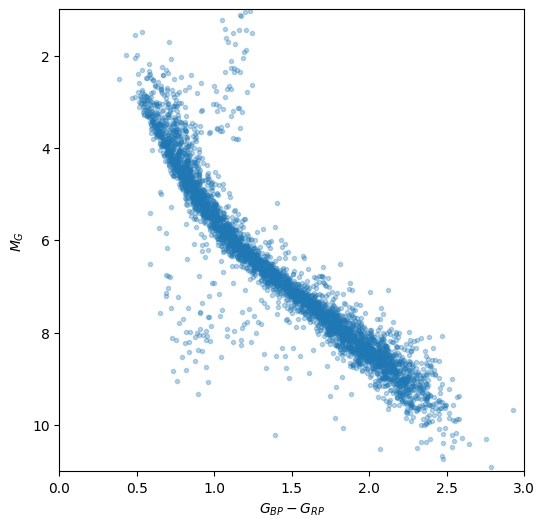

In [17]:
fig,ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(BP_RP, M_G, marker='.', ls='none', alpha=0.3)
ax.set_xlim(0, 3)
ax.set_ylim(11, 1)

ax.set_xlabel('$G_{BP} - G_{RP}$')
ax.set_ylabel('$M_G$')

In [19]:
np.seterr(invalid='ignore')
hi_mass_mask = (
    (BP_RP > 0.5*u.mag)&(BP_RP < 1.5*u.mag)&
    (M_G > 2*u.mag)&(M_G < 3.75*u.mag)&
    (np.abs(galcen.v_y-220*u.km/u.s) < 50*u.km/u.s)
)

lo_mass_mask = (
    (BP_RP > 2*u.mag)&(BP_RP < 2.4*u.mag)&
    (M_G > 8.2*u.mag)&(M_G < 9.7*u.mag)&
    (np.abs(galcen.v_y-220*u.km/u.s) < 50*u.km/u.s)
)

In [29]:
hi_mass_color = 'tab:red'
lo_mass_color = 'tab:purple'

Text(0, 0.5, '$M_G$')

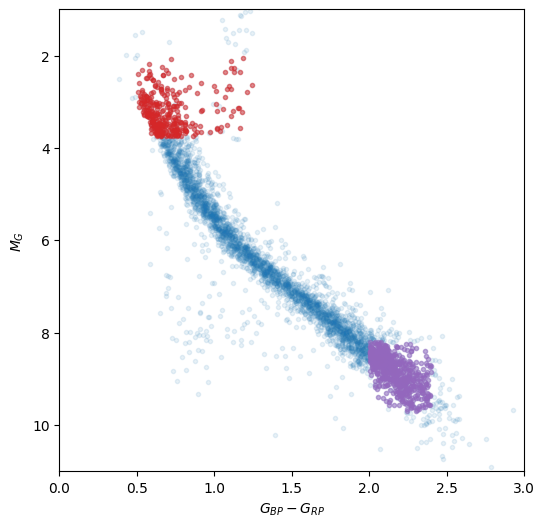

In [30]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.plot(BP_RP.value,M_G.value,marker='.',ls='none',alpha=0.1)
for mask, color in zip([hi_mass_mask, lo_mass_mask], [hi_mass_color, lo_mass_color]):
    ax.plot(BP_RP[mask].value, M_G[mask].value, marker='.', ls='none', alpha=0.5, color=color)
ax.set_xlim(0,3)
ax.set_ylim(11,1)
ax.set_xlabel('$G_{BP} - G_{RP}$')
ax.set_ylabel('$M_G$')

In [31]:
milky_way = gp.MilkyWayPotential()
milky_way

<CompositePotential disk,bulge,nucleus,halo>

In [33]:
different_disk_potential = gp.MilkyWayPotential(disk=dict(m=8e10*u.Msun))
different_disk_potential

<CompositePotential disk,bulge,nucleus,halo>

In [34]:
H = gp.Hamiltonian(milky_way)

In [35]:
w0_hi = gd.PhaseSpacePosition(galcen[hi_mass_mask].cartesian)
w0_lo = gd.PhaseSpacePosition(galcen[lo_mass_mask].cartesian)
w0_hi.shape, w0_lo.shape

((311,), (593,))

In [36]:
orbits_hi = H.integrate_orbit(w0_hi, dt=1*u.Myr, t1 = 0*u.Myr, t2=500*u.Myr)
orbits_lo = H.integrate_orbit(w0_lo, dt=1*u.Myr, t1 = 0*u.Myr, t2=500*u.Myr)

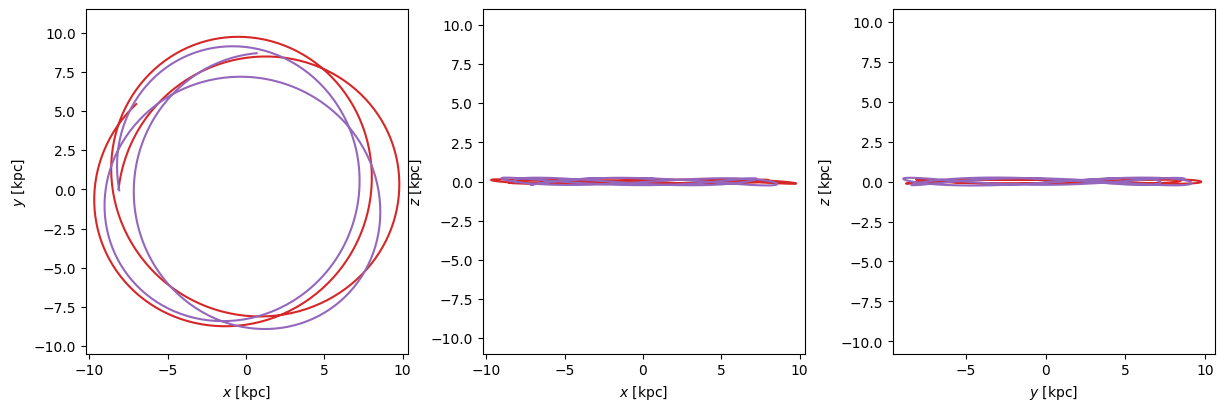

In [37]:
fig = orbits_hi[:,0].plot(color=hi_mass_color)
_= orbits_lo[:,0].plot(color=lo_mass_color, axes=fig.axes)

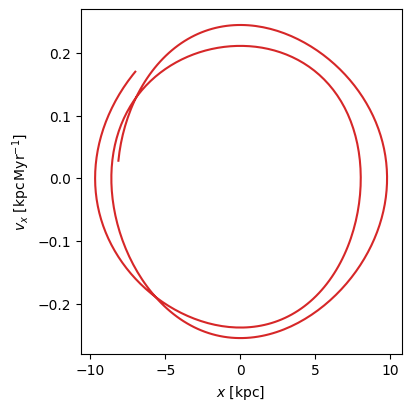

In [38]:
fig = orbits_hi[:,0].plot(['x','v_x'],auto_aspect=False, color=hi_mass_color)

(-0.3, 0.3)

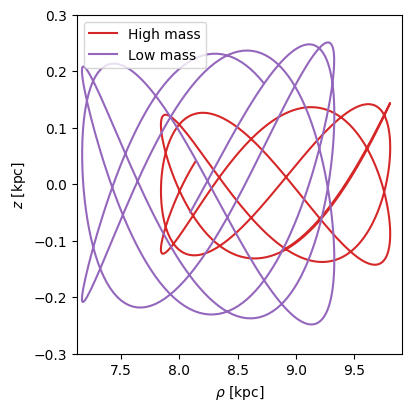

In [41]:
fig = orbits_hi[:,0].cylindrical.plot(['rho','z'],label='High mass', color=hi_mass_color)
_ = orbits_lo[:,0].cylindrical.plot(['rho','z'],label='Low mass', color=lo_mass_color, axes=fig.axes)

fig.axes[0].legend(loc='upper left')
fig.axes[0].set_ylim(-0.3,0.3)

In [42]:
zmax_hi = orbits_hi.zmax(approximate=True)
zmax_lo = orbits_lo.zmax(approximate=True)

Text(0.5, 0, '$z_{\\rm max}$[$\\mathrm{kpc}$]')

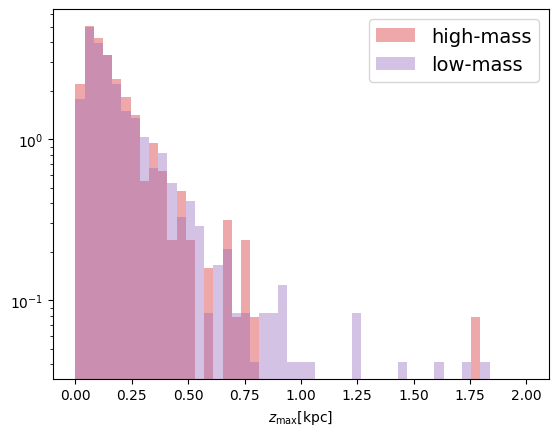

In [46]:
bins = np.linspace(0,2,50)
plt.hist(zmax_hi.value, bins=bins,alpha=0.4,density=True,label='high-mass',color=hi_mass_color)
plt.hist(zmax_lo.value, bins=bins,alpha=0.4,density=True,label='low-mass',color=lo_mass_color)

plt.legend(loc='best', fontsize=14)
plt.yscale('log')
plt.xlabel(r'$z_{\rm max}$'+'[{0:latex}]'.format(zmax_hi.unit))